# Advanced Data Science
<p/>

### Data Preprocessing - Descriptive Statistics and Exploratory Data Visualization 

In [11]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Pull in the libraries we need
import numpy as np
import pandas as pd
from pandas import DataFrame

#Pull in the plotting library and specify to display inline/static images
import matplotlib.pyplot as plt
%matplotlib inline

## Kaggle `Datasets`
---
We access the Kaggle Experience at: https://www.kaggle.com/

To get to the pre-loaded data, navigate to the Datasets menu to find:<br>
https://www.kaggle.com/datasets

Our preprocessing experiments today will be using the `Predict Pet Adoption Status` dataset

In [12]:
#First step is to find the data and gain an upderstanding 
#then dowload the .csv file and setup a variable for it
fileName = "pet_adoption_data.csv"

#Then use the pandas read_csv to load the data into a dataframe
petData = pd.read_csv(fileName)
petData

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [22]:
#Gathering information about the dataset varies based on the source (e.g., .DESCR from Scikit Learn)
#You can also read the website from the original source (e.g., if from Kaggle)
#As another choice, you can use the .info() command from your pandas dataframe
petData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


## Basic Statistics
---
Python provides basic built in functions like the `count()`, `unique()`, `shape()`, `min()`, `max()`, and `std()`

In [14]:
#We can use the built in functions to get counts and if target provided, unique classes
print('There are', petData['AgeMonths'].count(), 'observations in this dataset')
classes = petData['AdoptionLikelihood'].unique()
print('The target value of AdoptionLikelihood has', classes.shape[0], 'distinct classes of', classes)
print()

classBalance = petData['AdoptionLikelihood'].value_counts()
print('The number of observations in class [0-Unlikely] is', classBalance[0], 'and in class [1-Likely] is',classBalance[1])
print()

#You can also use the built in functions to get the the min, max, and std of a particular feature/column
minAge = petData['AgeMonths'].min()
maxAge = petData['AgeMonths'].max()
stdAge = petData['AgeMonths'].std()
print('Some basic statistics for the Age (in months) of the pets feature/colum are:')
print('The range is:', minAge, 'to' , maxAge, 'months', 'and has a standard deviation of', stdAge.round(2))

There are 2007 observations in this dataset
The target value of AdoptionLikelihood has 2 distinct classes of [0 1]

The number of observations in class [0-Unlikely] is 1348 and in class [1-Likely] is 659

Some basic statistics for the Age (in months) of the pets feature/colum are:
The range is: 1 to 179 months and has a standard deviation of 52.15


## Basic Statistics
---
Pandas provides the `describe()` function (similar to R's `summary()`)

In [15]:
#We can get some basic statistics for each feature/column in our dataframe at once
petData.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [16]:
#Notice, the .describe() returns statistics for just the numerical features/columns by default
#You can gain information on the categorical features/columns by including the object types
petData.describe(include = "object")

,PetType,Breed,Color,Size
count,2007,2007,2007,2007
unique,4,7,5,3
top,Dog,Rabbit,White,Medium
freq,522,493,420,714


In [17]:
#And further refine your understanding of the makeup of your catagorical feature/column as neededpetData['PetType'].value_counts()
petData['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [18]:
petData['Breed'].value_counts()

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

## Basic Visualization
---
Matplotlib, Pandas, Plotly are all simple visualization libraries, they all have some functions for<br>
explorting our data, such as: `Histograms`, `Scatter Plots`, and `Bar Charts`

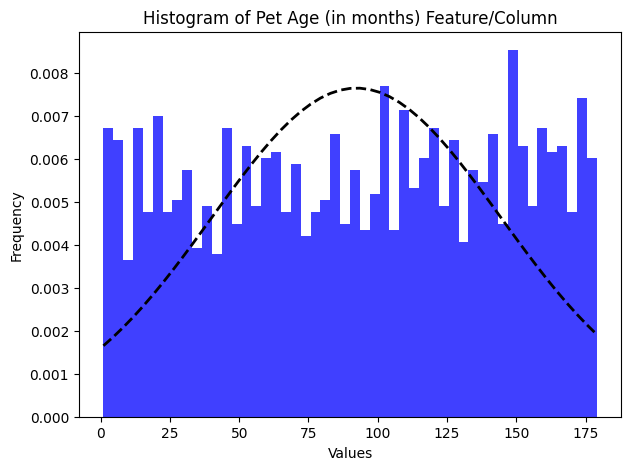

In [19]:
#Sample Histogram
#Setup the figure size for our plot, set number of bins for data granularity 
plt.figure(figsize=(7, 5)) 
petAges = petData['AgeMonths']
n, bins, patches = plt.hist(petAges, bins=50, alpha=0.75, color='blue', density=1)  

#To add a best fit line, we need to fit the data, and calc the line
from scipy.stats import norm
(mu, sigma) = norm.fit(petAges)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth=2)

#Set the titles, labels, grid (optional), and use the .show() to display the histogram
plt.title('Histogram of Pet Age (in months) Feature/Column')  
plt.xlabel('Values')  
plt.ylabel('Frequency')
#plt.grid(True)
plt.show()

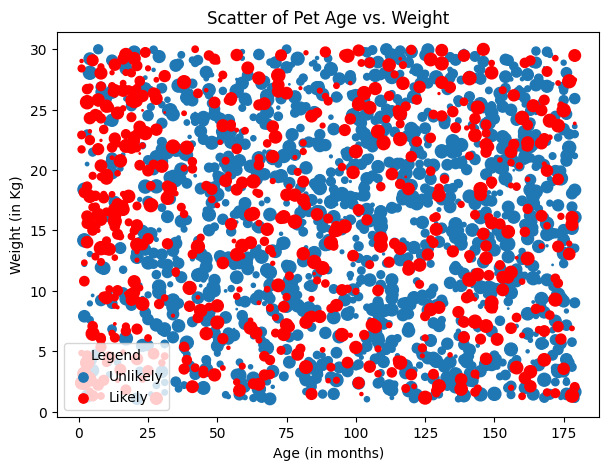

In [20]:
#Sample Scatter Plot
#Setup the figure size for our plot, set number of bins for data granularity, and 
plt.figure(figsize=(7, 5)) 
unlikely = petData[petData['AdoptionLikelihood'] == 0]
likely = petData[petData['AdoptionLikelihood'] == 1]

#There are several ways to accomplish the separation of class types, below is drawing two plots in the same frame
#Parameters for color and size are optional and can be adjusted for personal preference
plt.scatter(unlikely['AgeMonths'], unlikely['WeightKg'], s=unlikely['TimeInShelterDays'])  
plt.scatter(likely['AgeMonths'], likely['WeightKg'], c='red', s=likely['TimeInShelterDays'])  

#Set the colorbar, titles, labels, grid (optional), and use the .show() to display the scatter plot
plt.legend(title='Legend', labels=['Unlikely','Likely'])
plt.title('Scatter of Pet Age vs. Weight')  
plt.xlabel('Age (in months)')  
plt.ylabel('Weight (in Kg)')
#plt.grid(True)
plt.show()

<Figure size 700x500 with 0 Axes>

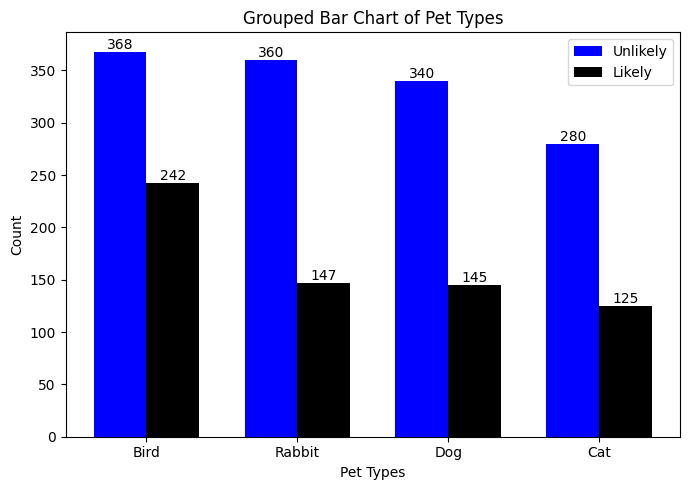

In [21]:
#Sample Bar Graph
#Setup the figure size for our plot, set number of bins for data granularity, and 
plt.figure(figsize=(7, 5)) 
unlikely = petData[petData['AdoptionLikelihood'] == 0]
likely = petData[petData['AdoptionLikelihood'] == 1]

# Categories
categories = petData['PetType'].unique()
unlikelyValues = unlikely['PetType'].value_counts().values 
likelyValues = likely['PetType'].value_counts().values  

# Width of the bars
bar_width = 0.35

# Indices for creating bars
indices = np.arange(len(categories))

# Creating the grouped bar plot
plt.figure(figsize=(7, 5))
unlikelyBars = plt.bar(indices - bar_width/2, unlikelyValues, bar_width, label='Unlikely', color='blue')
likelyBars = plt.bar(indices + bar_width/2, likelyValues, bar_width, label='Likely', color='black')

#Set the colorbar, titles, labels, grid (optional)
plt.legend()
plt.title('Grouped Bar Chart of Pet Types')
plt.xlabel('Pet Types')
plt.ylabel('Count')
plt.xticks(indices, categories)
#plt.grid(True)

# Adding text annotations on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
add_labels(unlikelyBars)
add_labels(likelyBars)

#Set the param so that the plot fits in to the figure area, and use the .show() to display the bar chart
plt.tight_layout()
plt.show()